# <b><center>Github Data Visualisation / Analysis</center><b>
## <center>Preparé par : Bentaleb Saad<center>

In [21]:
from bokeh.plotting import *
from bokeh.models import HoverTool, Toggle
import pandas as pd
import seaborn as sns
output_notebook()


Loading BokehJS ...

-----------------
## Utils
-----------------

In [34]:
def draw_points_graph(x, y, average=True, title="Graph"):
    if average:
        x = x.groupby(x.index // 1000).mean()
        y = y.groupby(y.index // 1000).mean()

    # create a new plot with a specific size
    p = figure(sizing_mode="stretch_width", max_width=500, height=250, title=title)

    # add a circle renderer
    circle = p.circle(x, y, fill_color="red", size=4)

    # define the hover tool
    hover = HoverTool(tooltips=[("Forks", "@x"), ("Stars", "@y")], renderers=[circle])

    # add the hover tool to the plot
    p.add_tools(hover)

    # show the plot
    show(p)


-------------
## Loading the data
-------------

In [22]:
# chargement des données
df = pd.read_csv('visualisation_data.csv')
df.dropna(inplace=True)
df.head()

,name,url,description,stars,created_at,language,forks,watchers,open_issues,owner,contributors_names,contributors_count,languages_used
0,learn-javascript,https://github.com/sumn2u/learn-javascript,A book that teaches JavaScript,635,2023-01-01T15:16:26Z,HTML,32,635,1,sumn2u,"[{'contributors_names': ['gnwx', 'sumn2u', 'An...",82,"{'HTML': 18686, 'Dockerfile': 365}"
1,LinksHub,https://github.com/rupali-codes/LinksHub,LinksHub aims to provide developers with acces...,359,2023-01-01T18:55:44Z,TypeScript,305,359,99,rupali-codes,"[{'contributors_names': ['rupali-codes', 'CBID...",451,"{'TypeScript': 67498, 'CSS': 2814, 'JavaScript..."
2,90DaysOfDevOps,https://github.com/LondheShubham153/90DaysOfDe...,This repository is a Challenge for the DevOps ...,352,2023-01-01T11:41:21Z,Python,2274,352,54,LondheShubham153,"[{'contributors_names': ['LondheShubham153', '...",256,{'Python': 368}
3,Obsidian-Tasks-Timeline,https://github.com/702573N/Obsidian-Tasks-Time...,A custom view build with Obsidian-Dataview to ...,174,2023-01-01T22:02:50Z,JavaScript,14,174,18,702573N,"[{'contributors_names': ['702573N', 'dranidis'...",23,"{'JavaScript': 34158, 'CSS': 10334}"
4,scribepod,https://github.com/yacineMTB/scribepod,Some of the scripts I use for scribepod @ http...,150,2023-01-01T00:34:43Z,Jupyter Notebook,15,150,0,yacineMTB,"[{'contributors_names': ['yacineMTB'], 'contri...",13,"{'Jupyter Notebook': 75398, 'TypeScript': 2824..."


------------------------------------------
## 1 - Correlation entre les valeurs numériques dans les repos
------------------------------------------

In [23]:
# correlation entre les variables
corr = df[['stars', 'forks', 'watchers', 'open_issues', 'contributors_count']].corr()
corr

,stars,forks,watchers,open_issues,contributors_count
stars,1.000000,0.788956,1.000000,0.581461,0.247701
forks,0.788956,1.000000,0.788956,0.425130,0.186431
watchers,1.000000,0.788956,1.000000,0.581461,0.247701
open_issues,0.581461,0.425130,0.581461,1.000000,0.413964
contributors_count,0.247701,0.186431,0.247701,0.413964,1.000000


<Axes: >

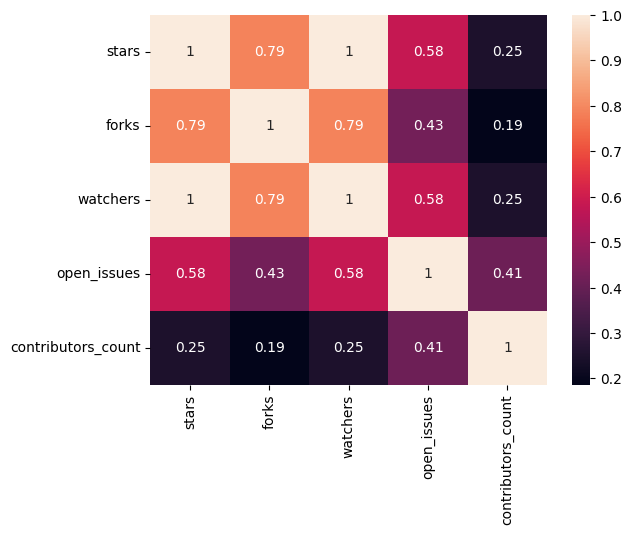

In [24]:
# heatmap using seaborn
sns.heatmap(corr, annot=True)

In [37]:

draw_points_graph(df['forks'], df['stars'], average=False,title="Forks vs Stars")

In [26]:
# from bokeh.plotting import figure, show
# from bokeh.models import HoverTool, CustomJS, CheckboxGroup
# from bokeh.layouts import column

# # Create a new plot with a specific size
# p = figure(sizing_mode="stretch_width", max_width=500, height=250)

# # Add a circle renderer
# circle = p.circle('forks', 'stars', fill_color="red", size=4, source=df)

# # Define the hover tool
# hover = HoverTool(tooltips=[("Forks", "@forks"), ("Stars", "@stars")], renderers=[circle])
# p.add_tools(hover)

# # Callback function for the checkbox group
# callback = CustomJS(args=dict(circle=circle, x=df['forks'], y=df['stars']), code="""
#     const selected_indices = cb_obj.active;
#     const data = circle.data_source.data;
    
#     if (selected_indices.length === 0) {
#         // Show the original data
#         data['x'] = x;
#         data['y'] = y;
#     } else {
#         // Calculate the average
#         const step = 1000;
#         const average_x = [];
#         const average_y = [];
#         let sum_x = 0;
#         let sum_y = 0;
#         let count = 0;
        
#         for (let i = 0; i < x.length; i++) {
#             sum_x += x[i];
#             sum_y += y[i];
#             count++;
            
#             if (count === step) {
#                 average_x.push(sum_x / count);
#                 average_y.push(sum_y / count);
#                 sum_x = 0;
#                 sum_y = 0;
#                 count = 0;
#             }
#         }
        
#         if (count > 0) {
#             average_x.push(sum_x / count);
#             average_y.push(sum_y / count);
#         }
        
#         // Show the average data
#         data['x'] = average_x;
#         data['y'] = average_y;
#     }
    
#     circle.data_source.change.emit();
# """)

# # Checkbox group for average calculation
# checkbox_group = CheckboxGroup(labels=["Calculate Average \t \t \t \t \t "], active=[])
# checkbox_group.js_on_change('active', callback)

# # Show the plot and checkbox group
# show(column(p, checkbox_group))

--------------------
## 2 - top 10 technologies dans les repositories
--------------------

### a - Technologie dominants par repositories
--------------------

Text(0.5, 1.0, 'Top 10 technologies dominantes utilisée par les projets')

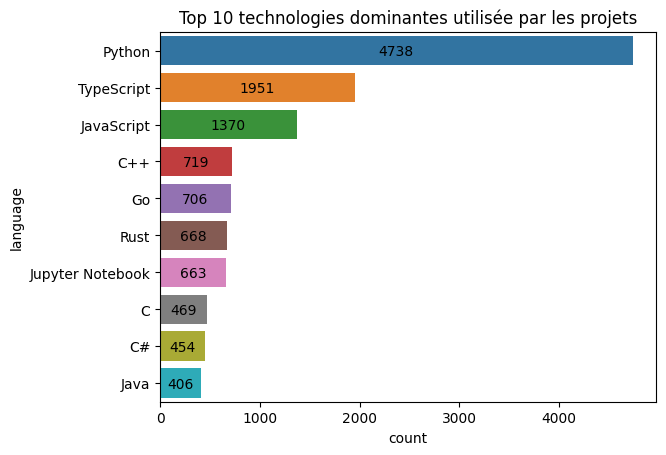

In [27]:
# top 10 most occuring languages and 
plt = sns.countplot(y='language', data=df, order=df['language'].value_counts().iloc[:10].index)

# add the value counts to the plot in the middle of the bars 
for p in plt.patches:
    plt.annotate(format(p.get_width(), '.0f'), 
                 (p.get_width() /2, p.get_y() + p.get_height()), 
                 ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')
plt.set_title('Top 10 technologies dominantes utilisée par les projets')

--------------------
### b - Bites de code par technologie
--------------------

#### i - création de la DF des bites ecrit par technologie
--------------------

In [28]:
# change a column type to dictionary
import ast
df['test'] = df['languages_used'].apply(lambda x: ast.literal_eval(x))

# get the unique languages
unique_languages = set()
for languages_dict in df['test']:
    unique_languages.update(languages_dict.keys())

len(unique_languages)

288

In [29]:
# Create a list of dictionaries for the new DataFrame
languages_list = []
for languages_dict in df['test']:
    row = {'url': '', **{language: 0 for language in unique_languages}}
    row.update(languages_dict)
    languages_list.append(row)

# Create the languages_df DataFrame
languages_df = pd.DataFrame(languages_list)

# Set the "url" column
languages_df['url'] = df['url']

languages_df.head()


,url,Filebench WML,Nix,Awk,Common Lisp,Classic ASP,Pony,CSS,SQL,Slash,...,Starlark,Blade,Ada,Apex,AMPL,CoffeeScript,UnrealScript,Logos,Smarty,NSIS
0,https://github.com/sumn2u/learn-javascript,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,https://github.com/rupali-codes/LinksHub,0,0,0,0,0,0,2814,0,0,...,0,0,0,0,0,0,0,0,0,0
2,https://github.com/LondheShubham153/90DaysOfDe...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,https://github.com/702573N/Obsidian-Tasks-Time...,0,0,0,0,0,0,10334,0,0,...,0,0,0,0,0,0,0,0,0,0
4,https://github.com/yacineMTB/scribepod,0,0,0,0,0,0,2521,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# save the dataframe to csv
languages_df.to_csv('languages_df.csv', index=False)

#### ii - Graphe des bites ecrit par technologie
--------------------

<Axes: title={'center': 'Top 10 (bites / 1000000) de code ecrites par technologie'}>

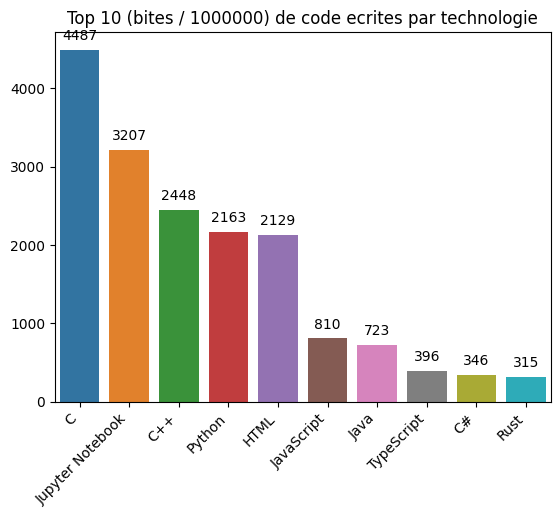

In [31]:
# give the sum of the values for each language
languages_no_url = languages_df.drop('url', axis=1)
sum = languages_no_url.sum().sort_values(ascending=False) / 1000000
# plot the top 10 most used languages rotating the x axis labels
plt = sns.barplot(x=sum.iloc[:10].index,
                    y=sum.iloc[:10].values)
# add the value counts to the plot in the middle of the bars
for p in plt.patches:
    plt.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')
plt.set_title('Top 10 (bites / 1000000) de code ecrites par technologie')

# remove x axis labels confusions
plt.set_xticklabels(plt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt
    

#### iii - correlation entre les top 10 technologies par bites
--------------------

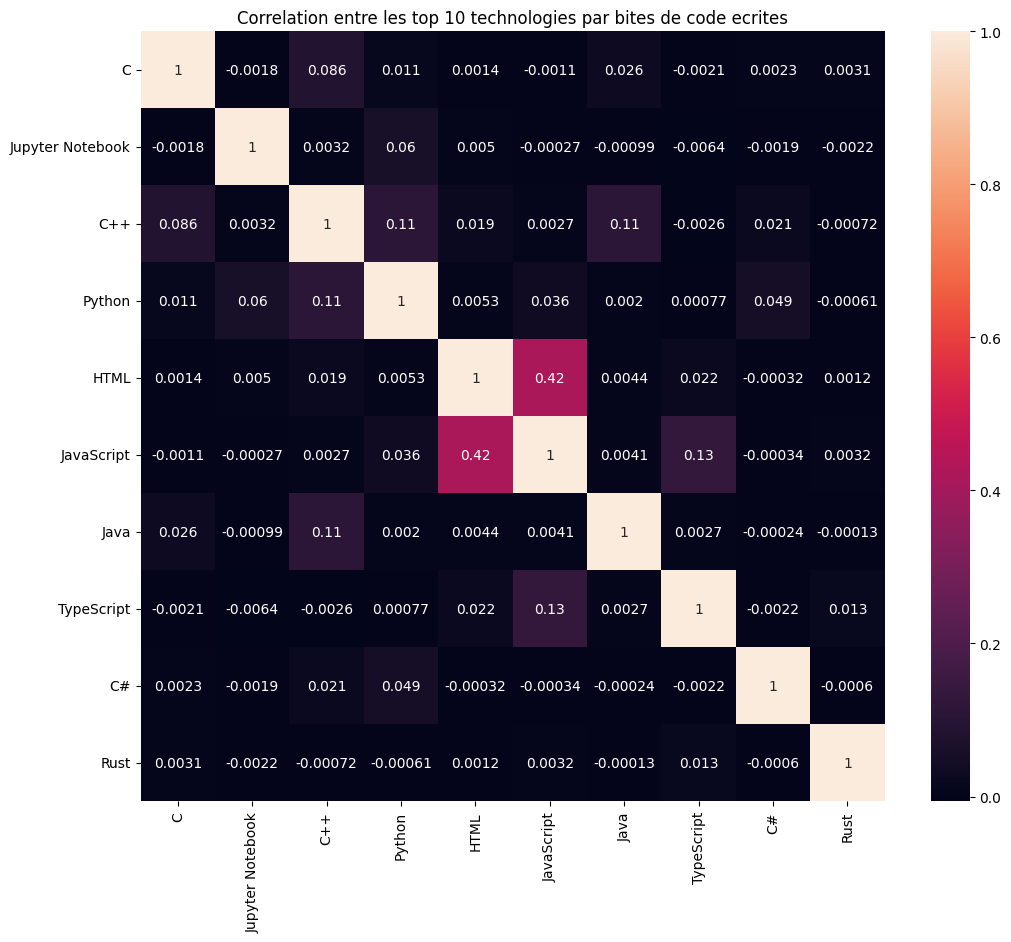

In [32]:
# top ten based on the sum columns namesof sum = languages_no_url.sum().sort_values(ascending=False)
top_ten = sum.iloc[:10].index
# correlation entre les technologies
corr_hm = sns.heatmap(languages_no_url[top_ten].corr(), annot=True)
corr_hm.set_title('Correlation entre les top 10 technologies par bites de code ecrites')
# increase the size of the heatmap
corr_hm.figure.set_size_inches(12, 10)

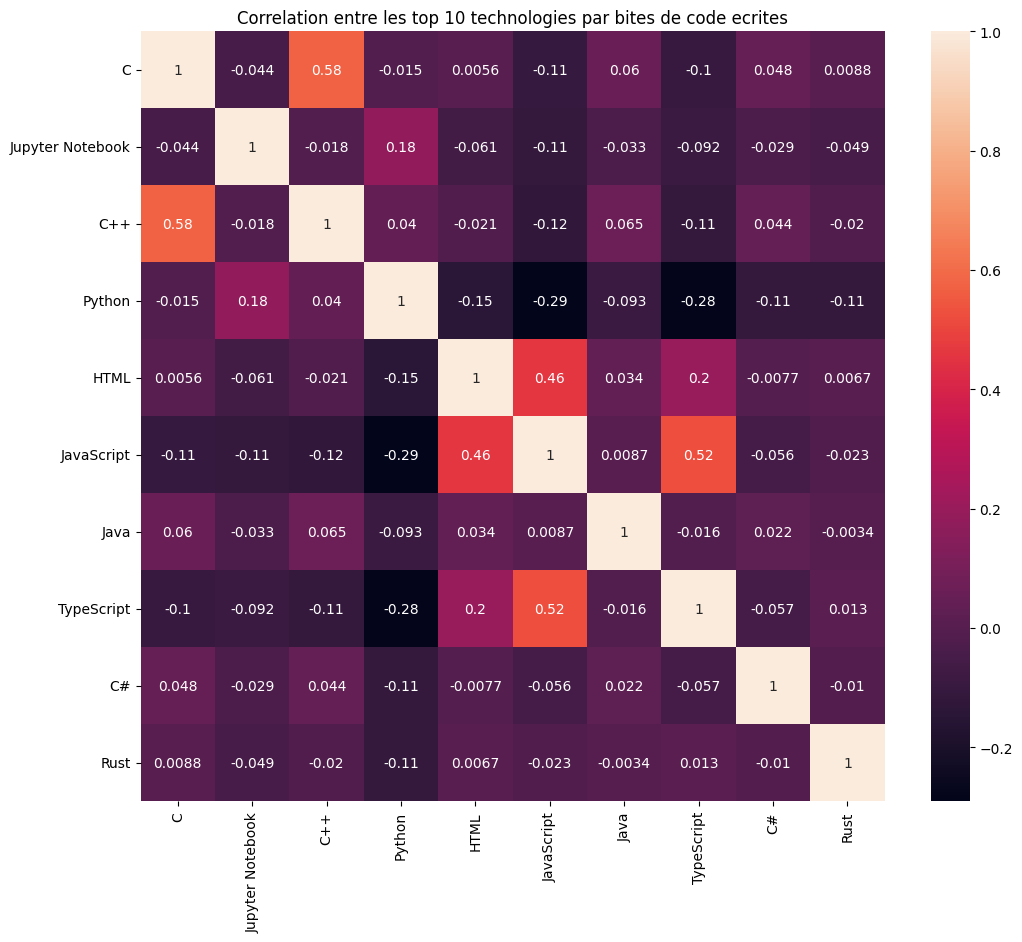

In [33]:
top_ten_for_corr = languages_no_url[top_ten]
# instead of numbers give 1 for each language if the value is not 0
top_ten_for_corr = top_ten_for_corr.applymap(lambda x: 1 if x > 0 else 0)
# correlation entre les technologies
corr_hm = sns.heatmap(top_ten_for_corr.corr(), annot=True)
corr_hm.set_title('Correlation entre les top 10 technologies par bites de code ecrites')
# increase the size of the heatmap
corr_hm.figure.set_size_inches(12, 10)

--------------
## 3 - Analyse des projets tendence
--------------